# Descriptive Analytics of the Data Used

The data selected for the purpose of this project is data related to Canada's monthly economic performance from January 2008 to December 2019. The data selected lists dollar values pegged to the value of the Canadian dollar in 2012. The data used for this project is a combination of a variety of different data all from the Statistics Canada website and is easily and readily availble.

The following data sets were used:

1. [Gross domestic product (GDP) at basic prices, by industry](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3610043401)

2. [Electric power generation, monthly receipts, deliveries and availability](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=2510001601)

3. [Wages, salaries and employers' social contributions (x 1,000)](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3610020501)

4. [International transactions in securities, portfolio transactions in Canadian and foreign securities, by type of instrument and issuer](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=3610002801&pickMembers%5B0%5D=3.3)

5. [Capital markets activities, gross new issues, retirements and net new issues, par value, Bank of Canada](https://www150.statcan.gc.ca/t1/tbl1/en/tv.action?pid=1010000301)


In order to be able to use the data, the data needs to be cleaned and aggregated. Several of the more granular datapoints are either missing or are reported with a low degree of confidence. In order to maintain a clean dataset only the "macro" indicators will be used. For each of the following datasets, they are as follows:

1. Gross domestic product (GDP) at basic prices, by industry
    - Aggregate GDP from all industries renamed as "GDP"


2. Electric power generation, monthly receipts, deliveries and availability
    - Total generation: Total generation includes nuclear, hydro, tidal, wind, solar, wave, geothermal, other non-combustible methods and combustible fuel generation.
    - Total receipts: Nationally, this is the sum of purchased receipts and other receipts from the United States. Provincially, this is the sum of electricity received from other provinces and from the United States.
    - Total deliveries: Nationally, this is the sum of deliveries of electricity to the United States. Provincially, this is the sum of electricity delivered to other provinces and to the United States.
    - Total electricity available for use. (total generation plus total receipts less total deliveries).
    

3. Wages, salaries and employers' social contributions
    - For wages, and salaries, all sub-categories are being included. This is in order to help determine if any one particular industry's economic activity as indicated through wages has any significant impact on the National GDP
    - The structure of the Wages data is as follows:
        - Compensation of employees
            - Wages and salaries
                - All goods-producing industries
                    - Agriculture, forestry, fishing and hunting
                    - Mining and oil and gas extraction
                    - Manufacturing
                    - Construction
                    - Utilities
                - All services-producing industries
                    - Trade
                    - Transportation and storage
                    - Information and cultural industries
                    - Finance, real estate and company management
                    - Professional and personal services industries
                    - Educational services
                    - Health care and social assistance
                    - Federal government public administration
                    - Military
                    - Federal government public administration excluding military
                    - Provincial and territorial government public administration
                    - Local government public administration
            - Employers' social contributions
        
        

4. Monetary value of international transactions in securities, portfolio transactions in Canadian and foreign securities
    - Canadian securities
    - Canadian debt securities
    - Canadian money market instruments
    - Canadian money market instruments, governments 2
    - Canadian money market instruments, corporations 3
    - Canadian bonds
    - Canadian bonds, governments
    - Canadian bonds, corporations
    - Canadian equity and investment fund shares
    - Foreign securities
    - Foreign debt securities
    - Foreign money market instruments
    - Foreign bonds
    - Foreign equity and investment fund shares
    

5. Capital markets activities, gross new issues, retirements and net new issues, par value, Bank of Canada. For each of the following categories, it includes Government of Canada, Provincial and Muncipal direct and indirect bonds, corporate bonds, common stocks and preferred stocks among other securities.
    - Retirements
    - Gross New Issues
    - Net New Issues
    
    
 




# Visualizing Data

The in the data set all naturally possess different ranges and have their own levels of volatility. In order to be able to visually compare the data to both each other and amongst themselves, the data has all been normalized. Doing this allows us to visualize the data on the same scale and compare them. This allows us to derive insights from the data, make accurate and informed decisions as to which features, variables, or columns to continue with both predictive and prescriptive analytics.

In [1]:
from load_data import *

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import numpy as np
import pandas as pd
import scipy.stats as st
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [5]:
data = load_data()
n_df = load_normalized_data()
s_df = load_normalized_selected_data()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


### Histogram of Each Variable

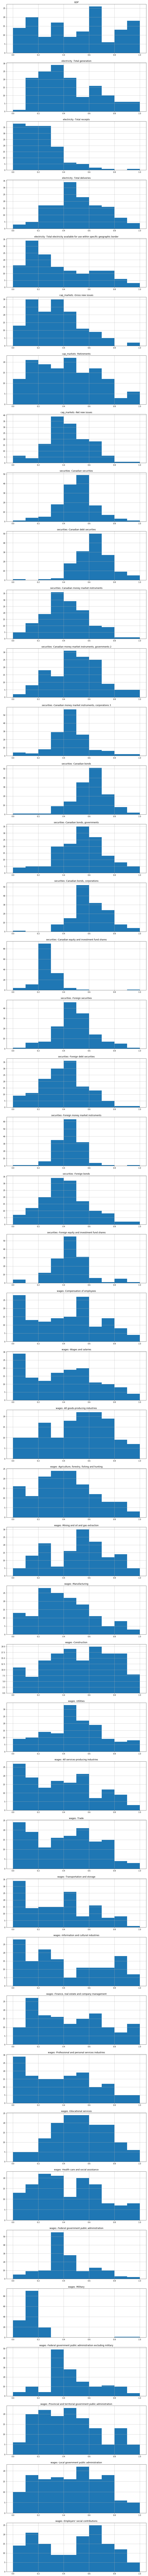

In [6]:
fig, axs = plt.subplots(len(n_df.columns),figsize=(14,len(n_df.columns)*6))
for n, col in enumerate(n_df.columns):
    n_df[col].hist(ax=axs[n],label=True)
    axs[n].set_title(col)

### Plotting Each Variable Against GDP

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


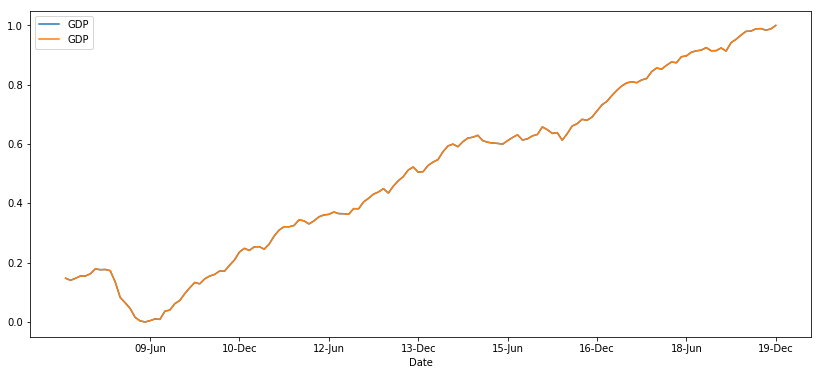

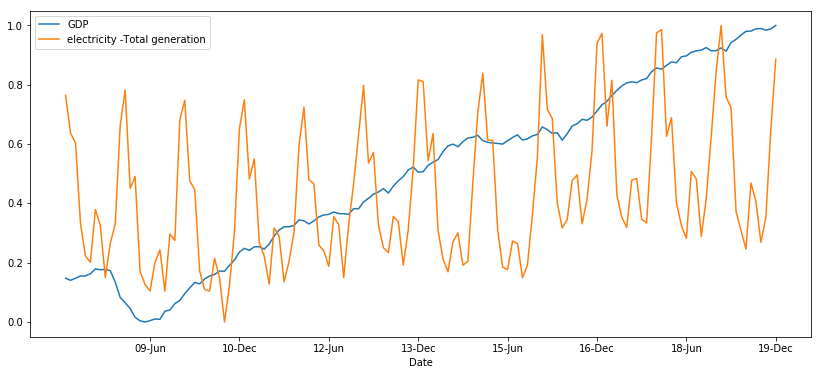

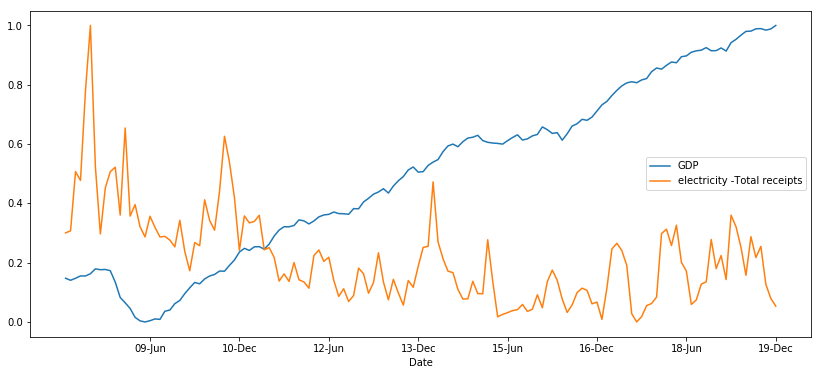

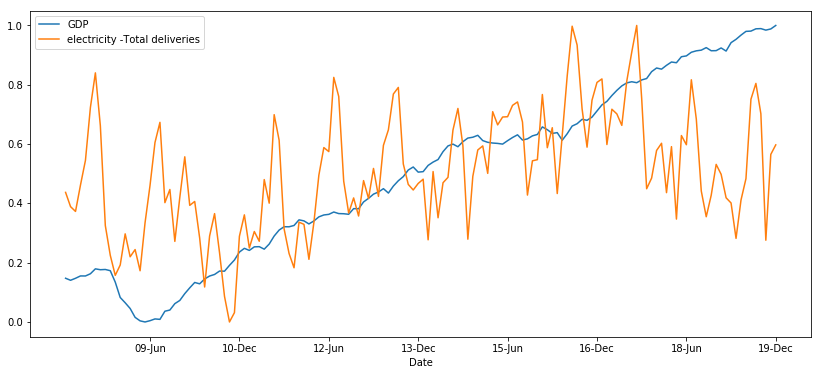

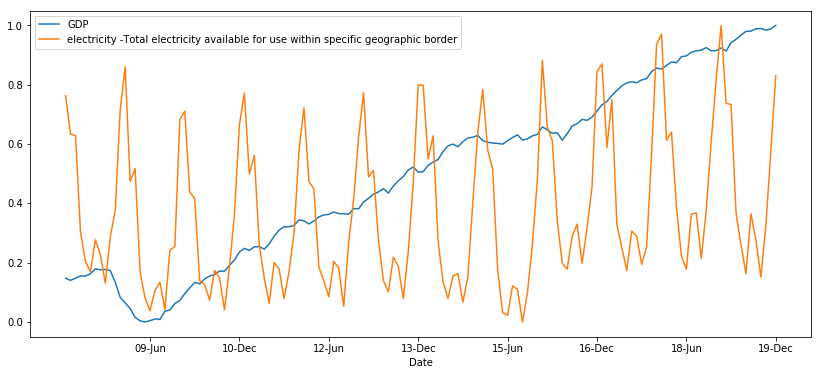

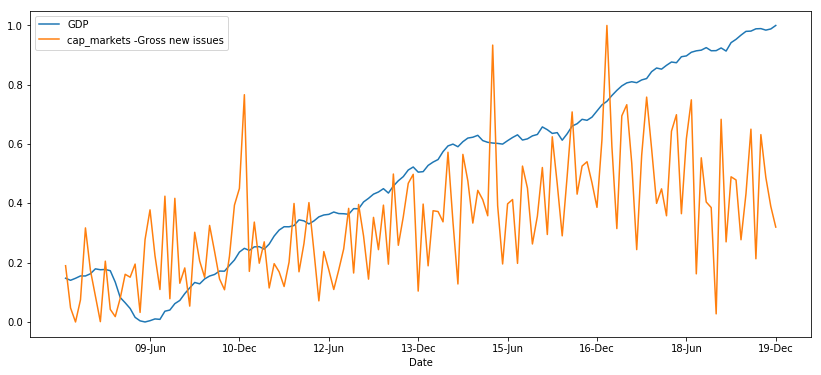

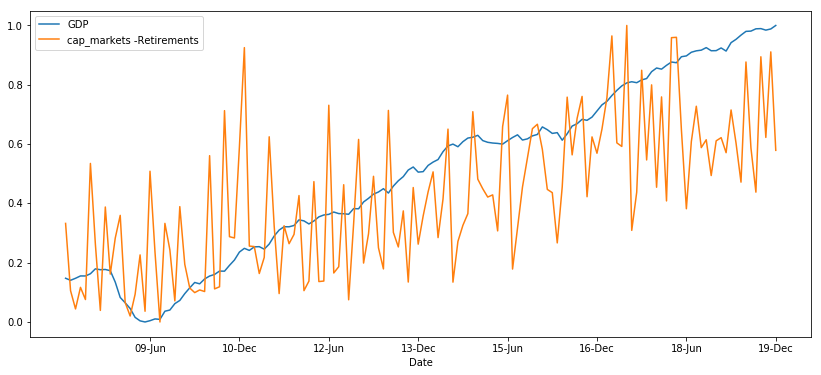

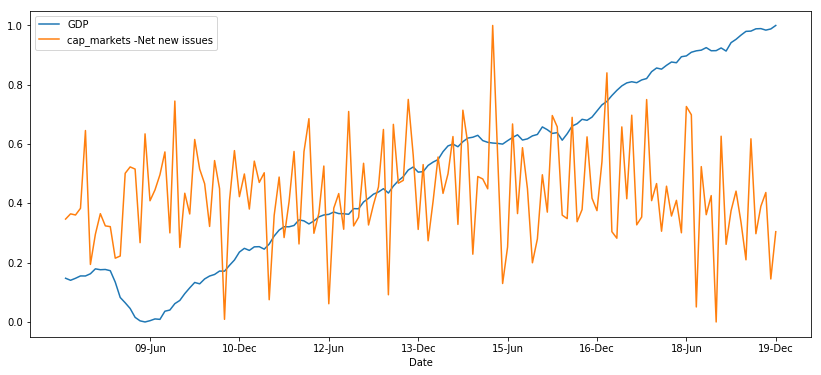

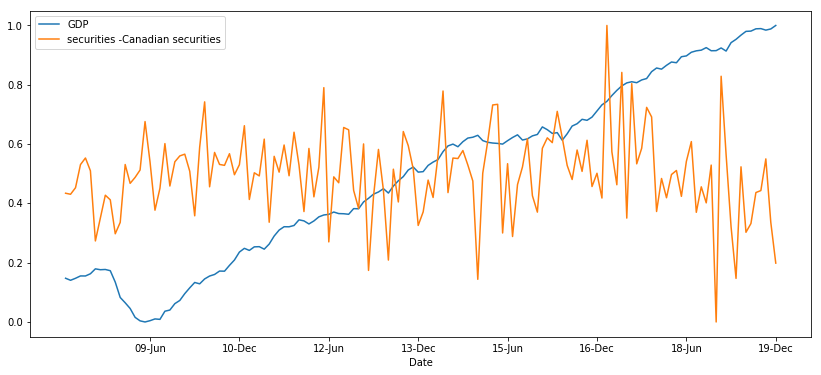

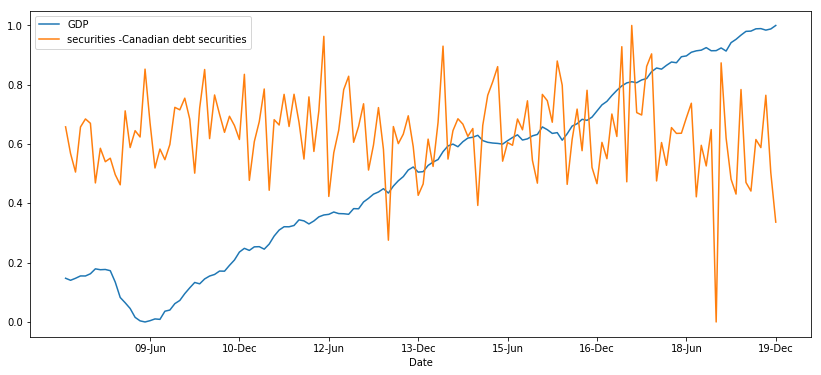

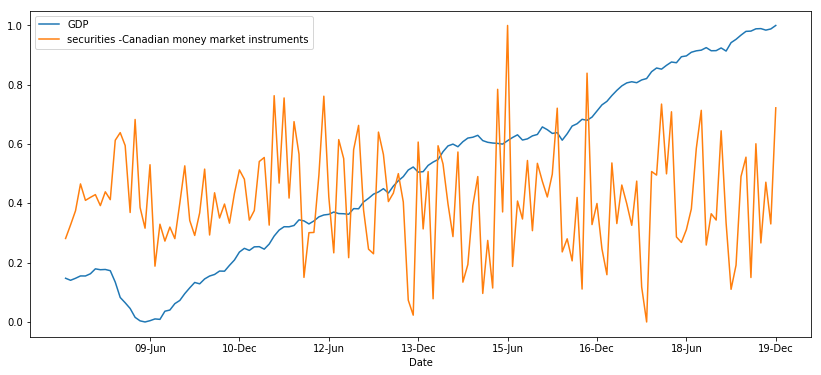

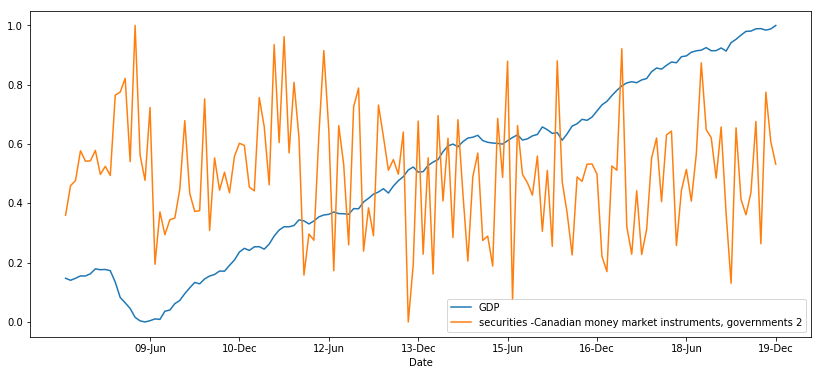

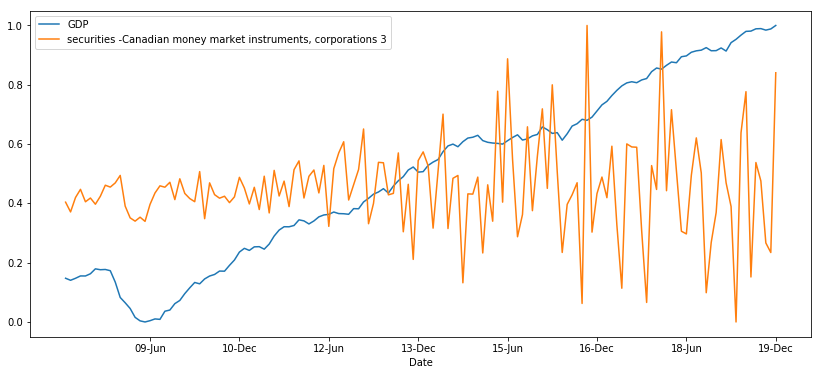

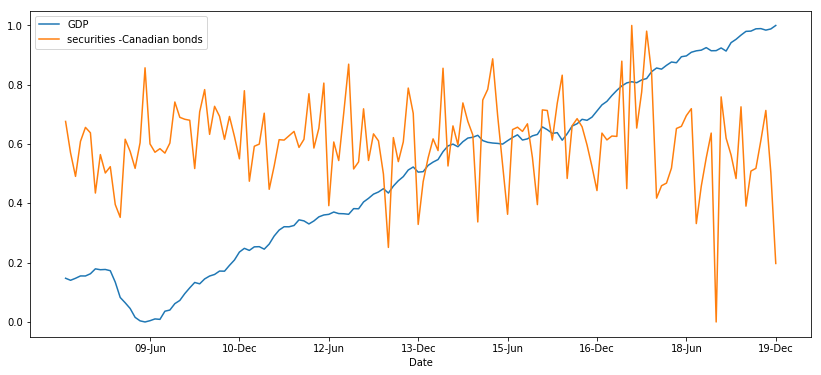

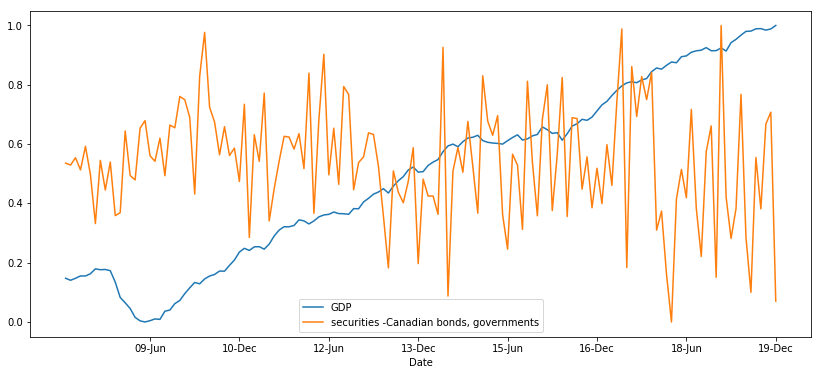

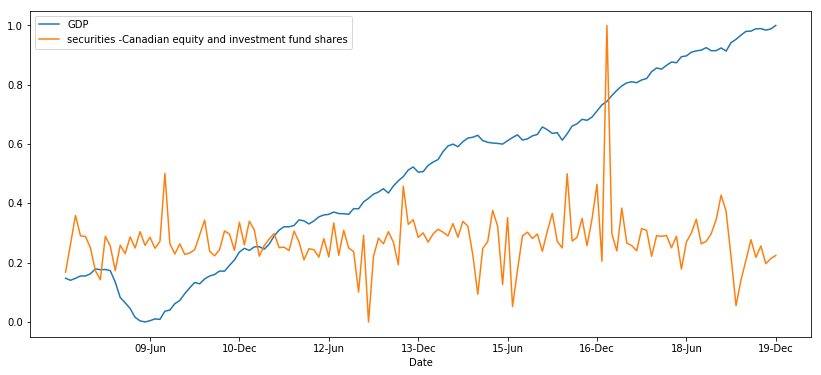

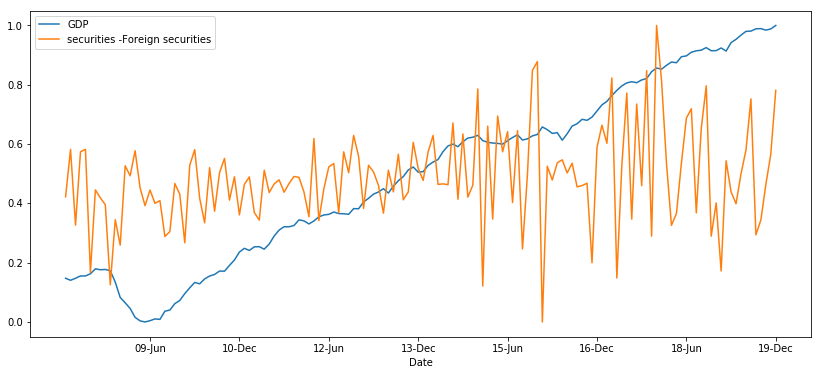

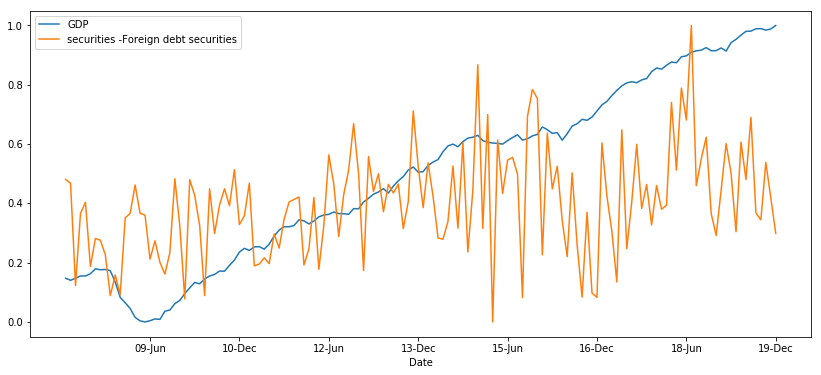

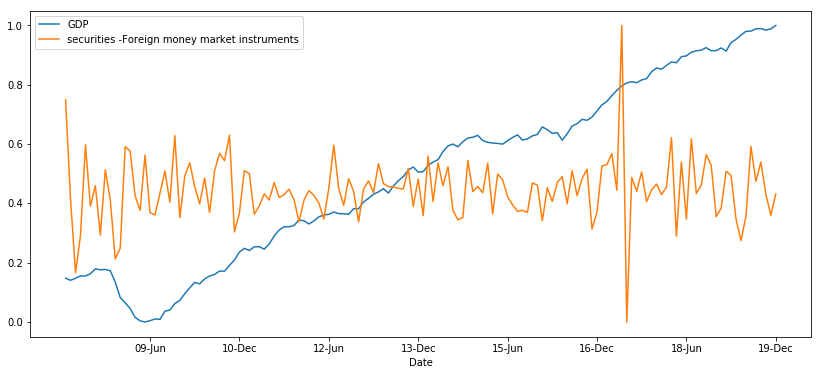

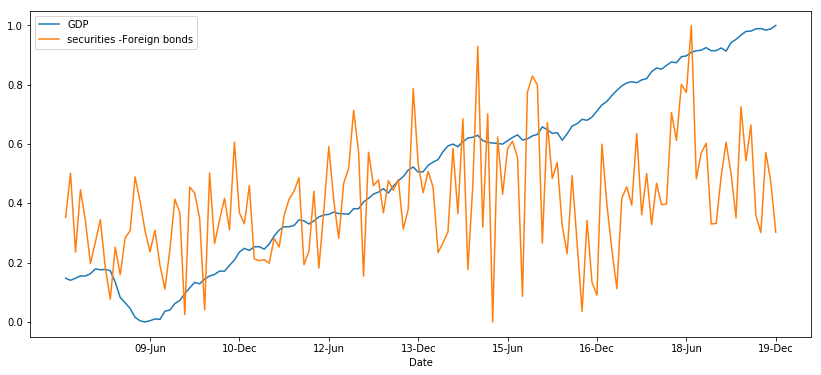

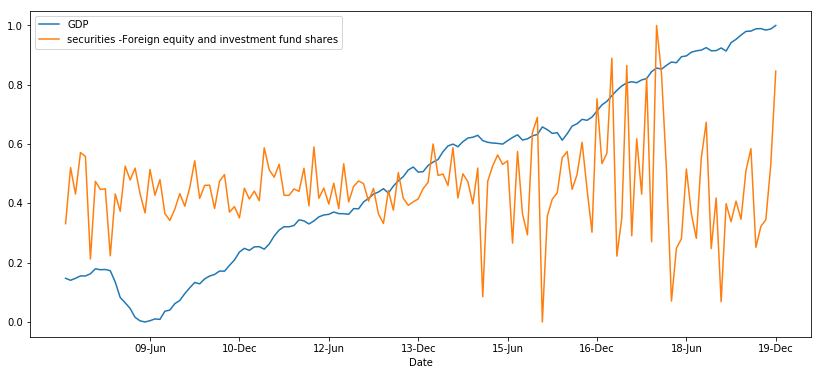

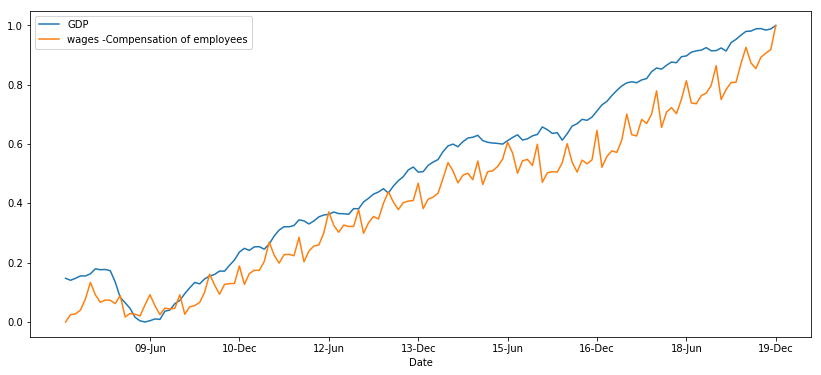

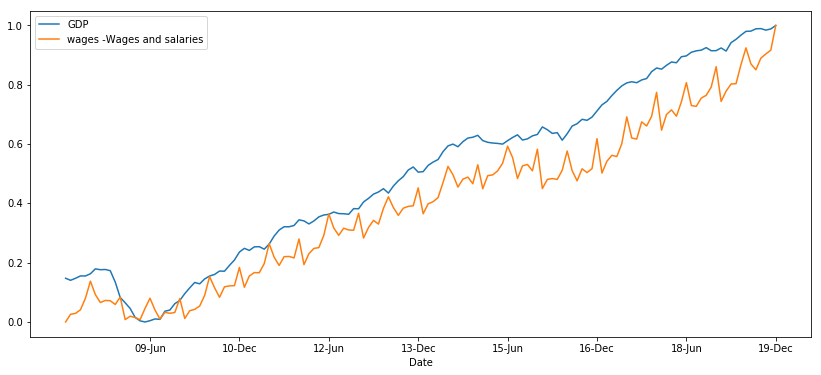

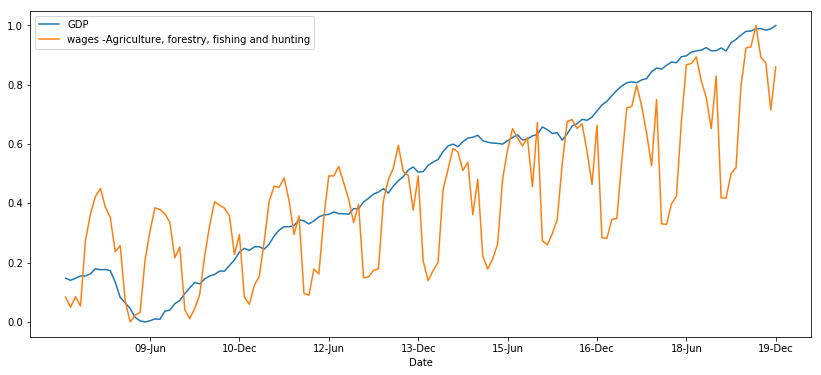

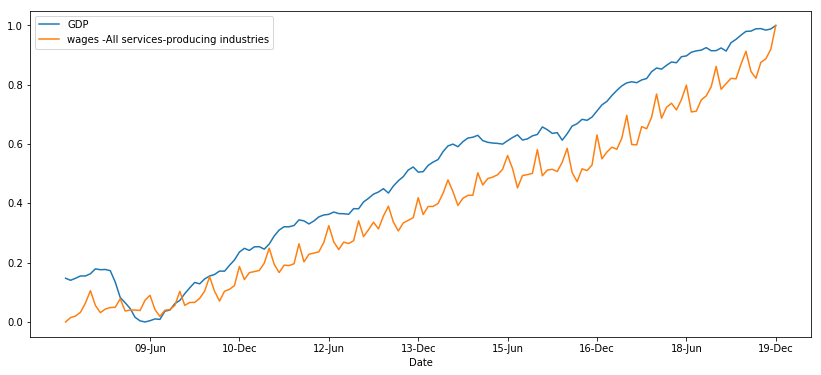

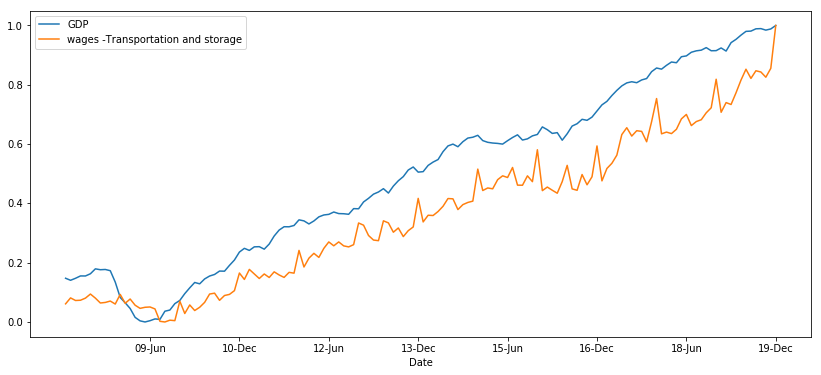

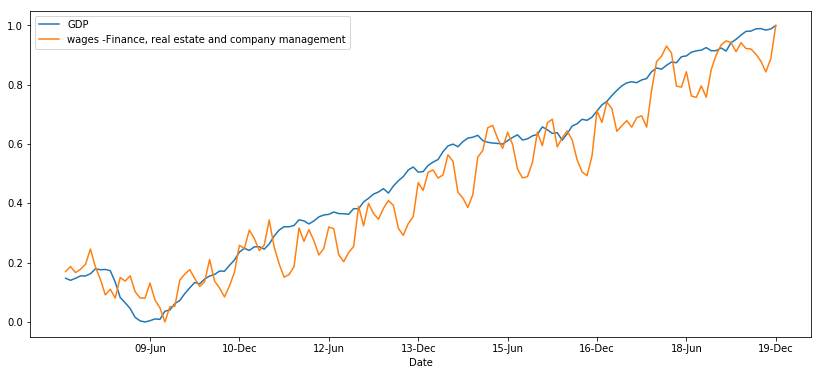

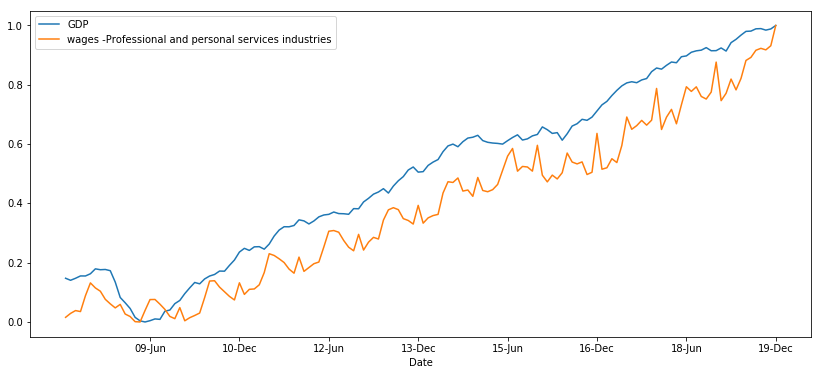

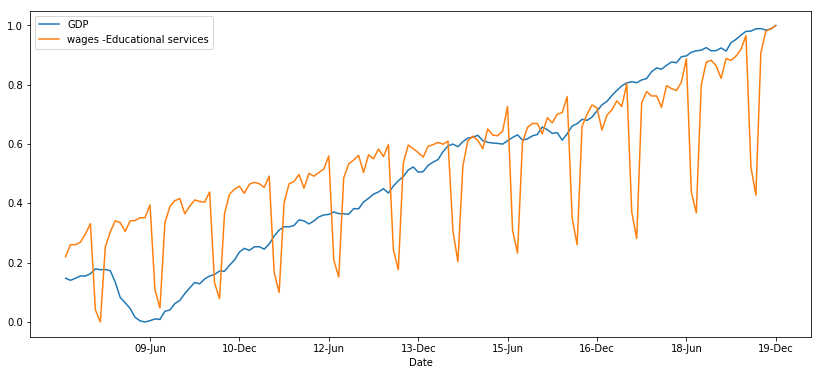

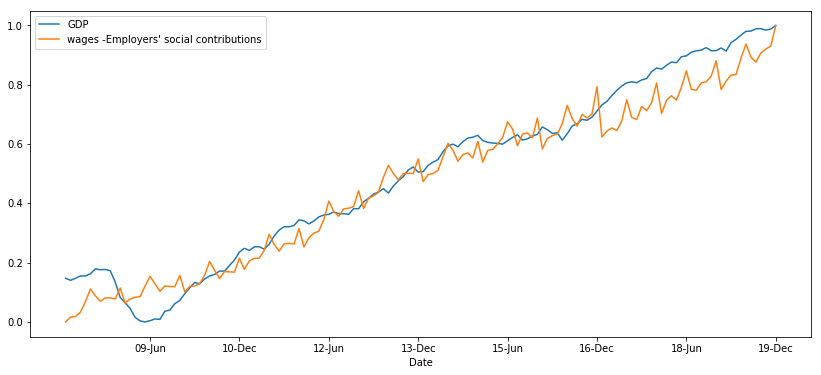

In [7]:
tick_labels = []
for i in range(1,9):
    tick_labels.append(list(n_df.index)[(i*18)-1])

for col in list(data.columns):
    plot_list = ['GDP']
    plot_list.append(col)
    plot_data = n_df[plot_list]
    plot_data.plot.line(figsize=(14,6),use_index=True)
    plt.xlabel('Date')
    ax = plt.axes()
    ax.set_xticklabels(tick_labels)
    ax.xaxis.set_ticks([17,35,53,71,89,107,125,143])


# Selecting Predictor Features

In [8]:
s_df = load_normalized_selected_data()

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/utils/validation.py:595: DataConversionWarning: Data with input dtype int64 was converted to float64 by MinMaxScaler.
  warnings.warn(msg, DataConversionWarning)


# Clustering Data - All Data

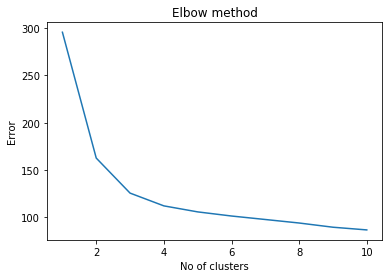

In [10]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(n_df)
    kmeans.fit(n_df)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(n_df)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
cluster_labels = list(kmeans.labels_)
n_df['cluster']= cluster_labels

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[0.23144955 0.36664406 0.2963128  0.40312297 0.33176617 0.22432304
  0.26774042 0.42464379 0.49699047 0.64508874 0.42884529 0.52636652
  0.44604121 0.61008656 0.57550676 0.58081464 0.26139634 0.44410828
  0.33812181 0.44116704 0.34247342 0.43964709 0.1735989  0.16452254
  0.30985152 0.27289232 0.41617015 0.23649569 0.32245352 0.30838942
  0.15651013 0.17579577 0.14603592 0.16138943 0.20610482 0.14500444
  0.37761094 0.21336502 0.32765406 0.11251744 0.35937083 0.23528023
  0.24585437 0.22111692]
 [0.74170187 0.49129687 0.14390628 0.60120618 0.40506908 0.45133949
  0.56469817 0.4410634  0.50085955 0.62645189 0.3992619  0.47348323
  0.45622814 0.60229438 0.50911678 0.62152383 0.28680531 0.52601193
  

##### Replotting with cluster labels

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


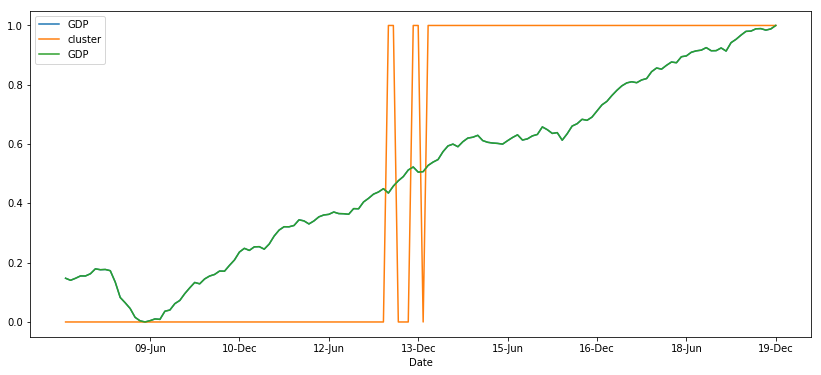

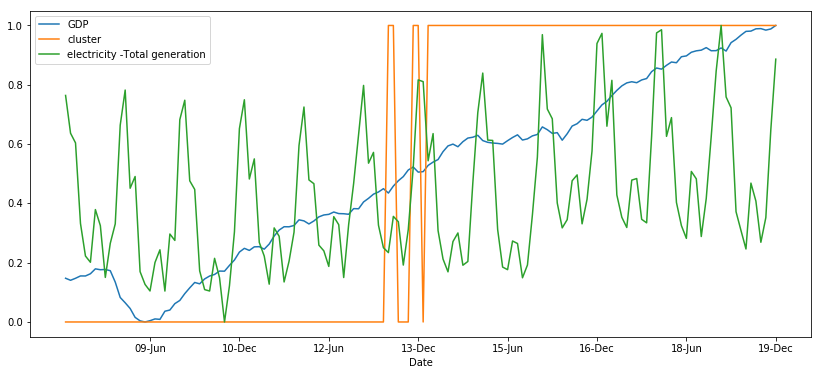

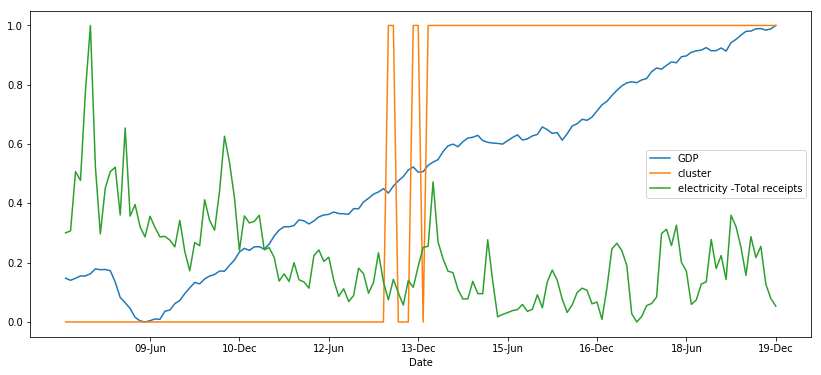

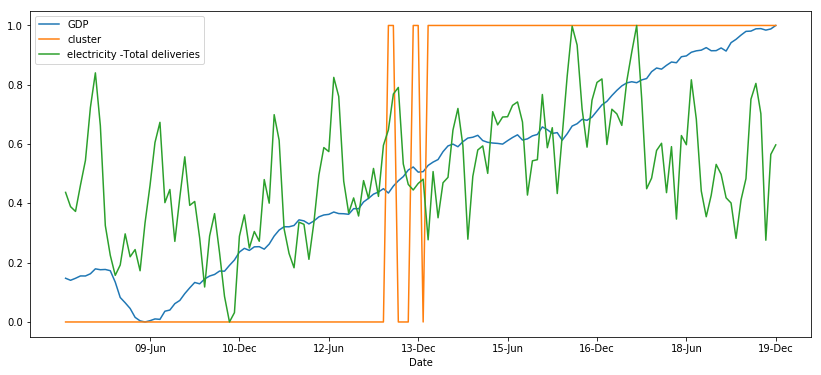

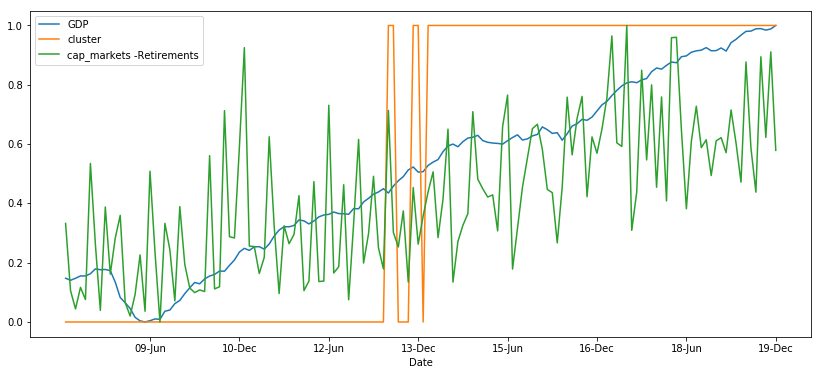

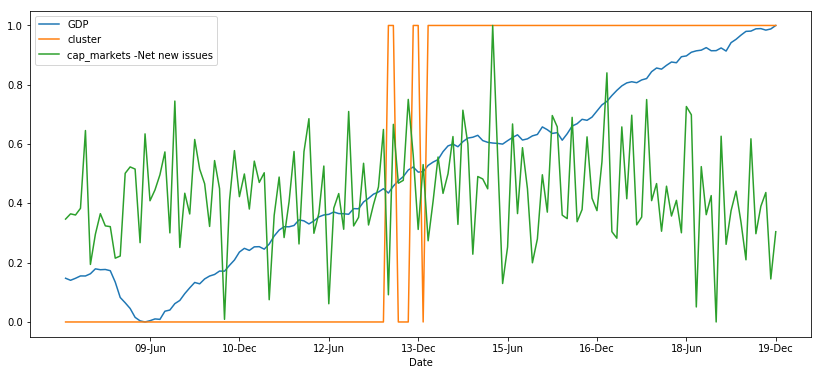

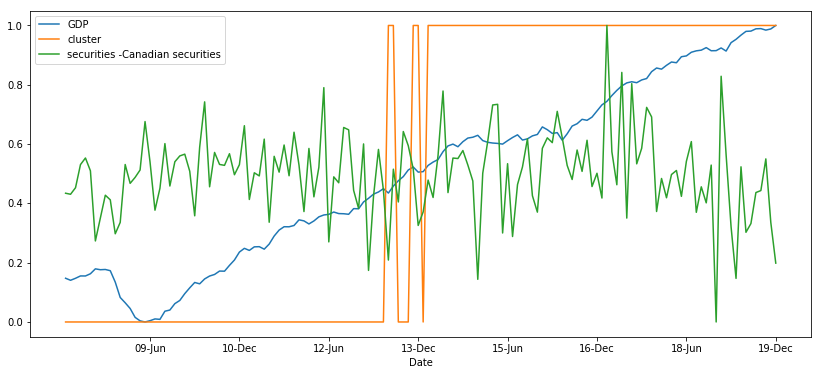

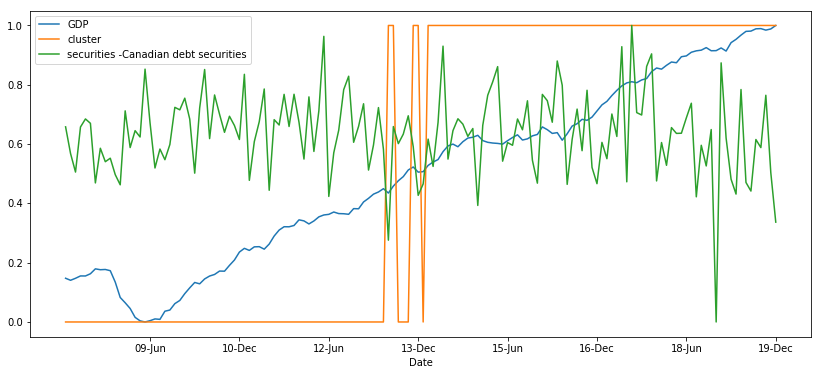

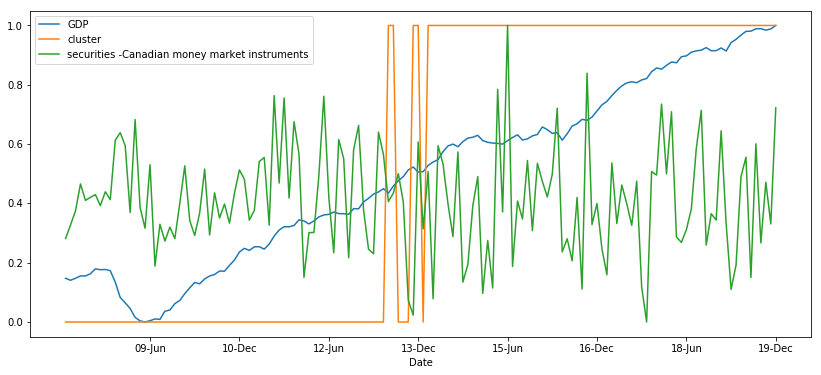

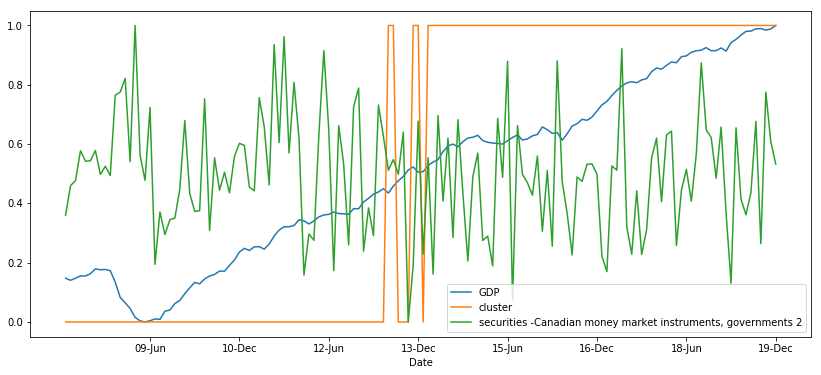

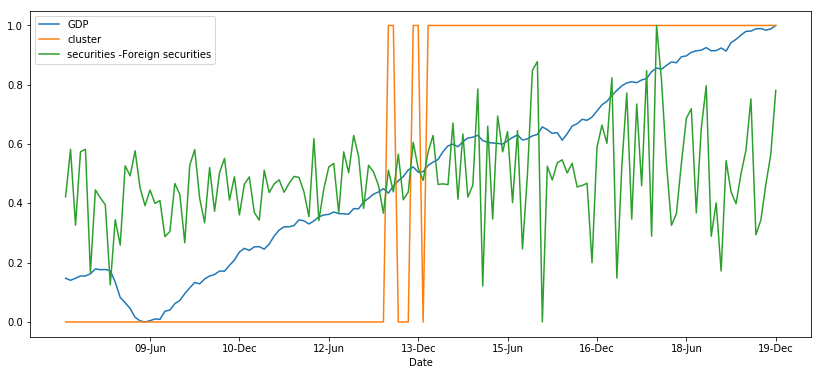

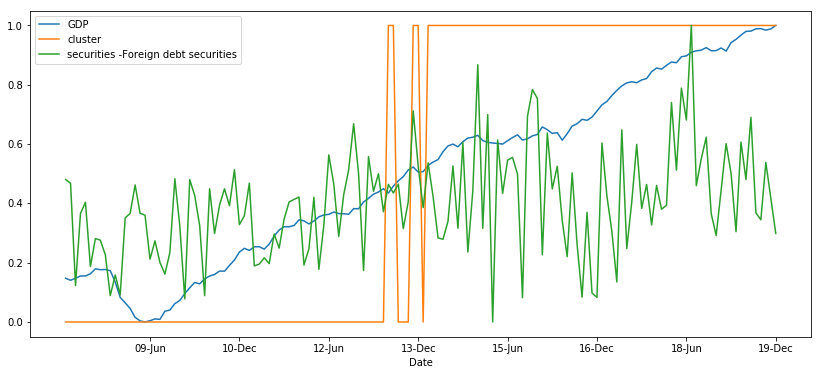

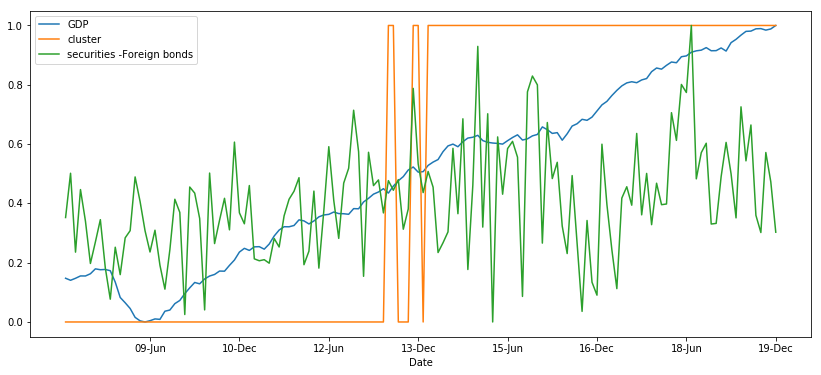

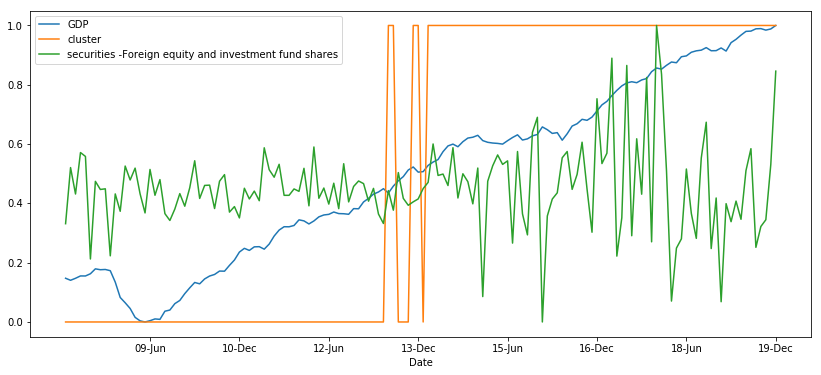

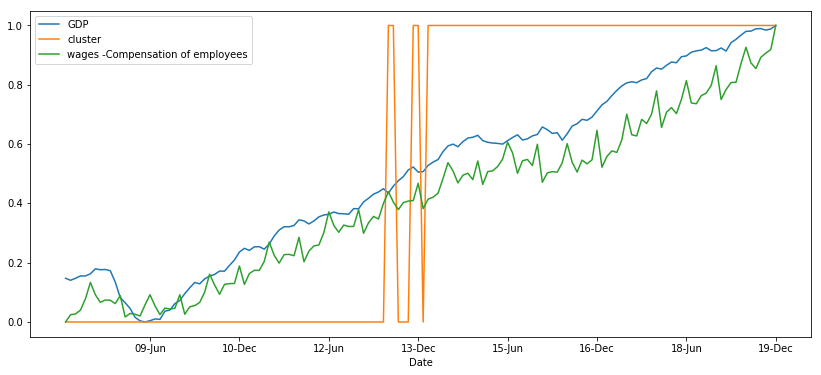

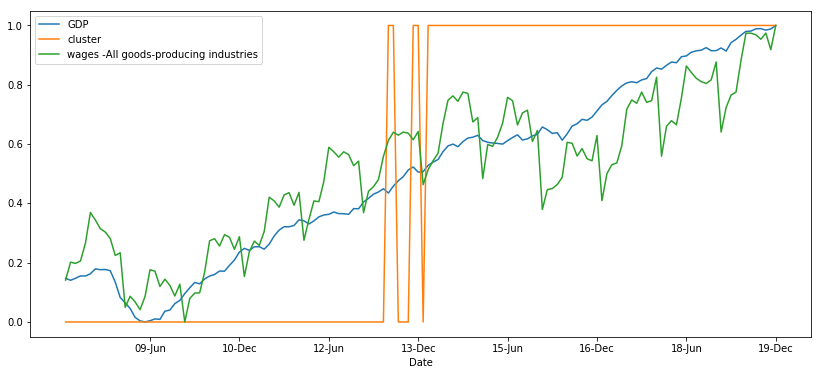

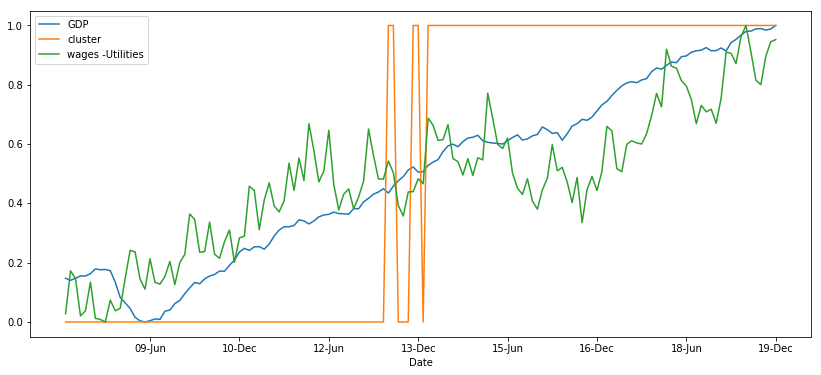

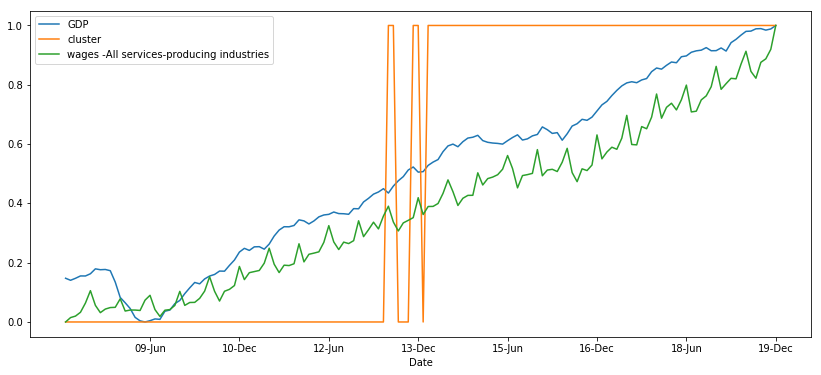

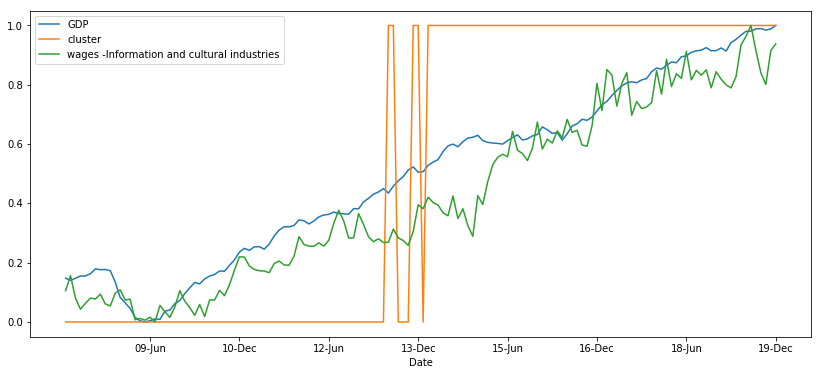

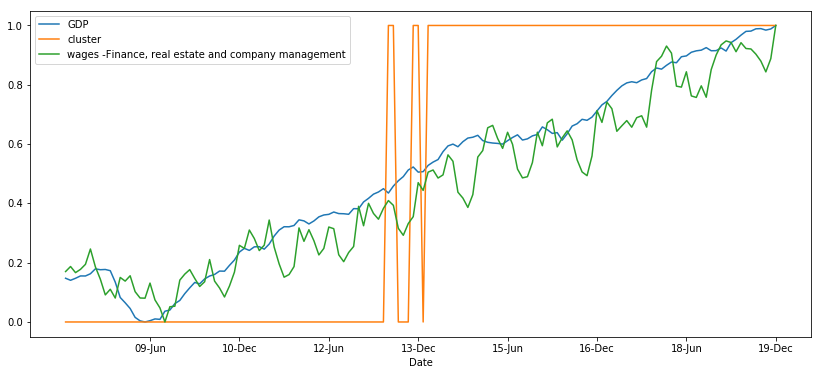

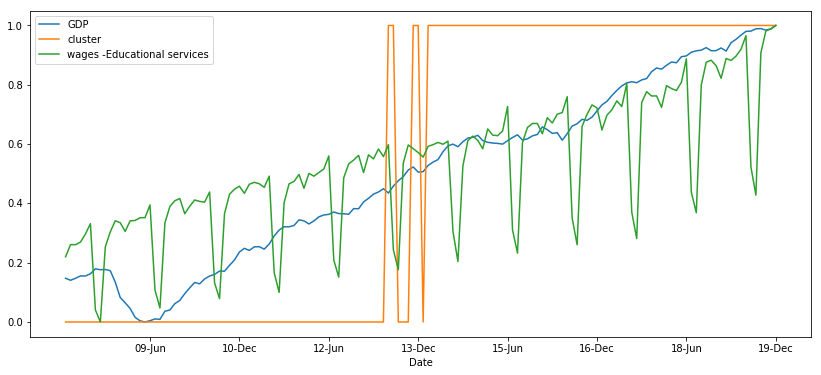

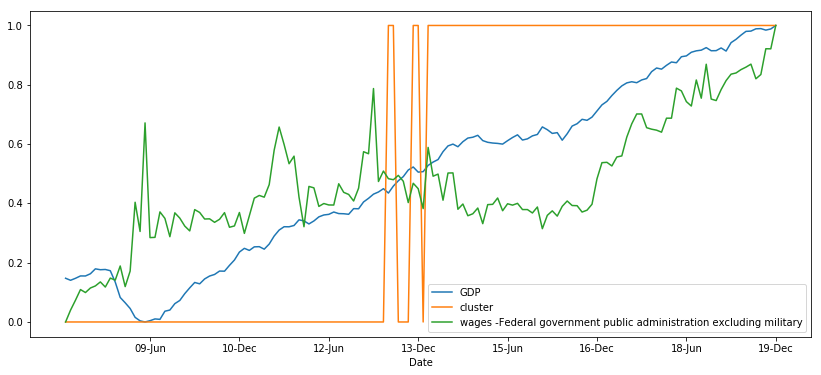

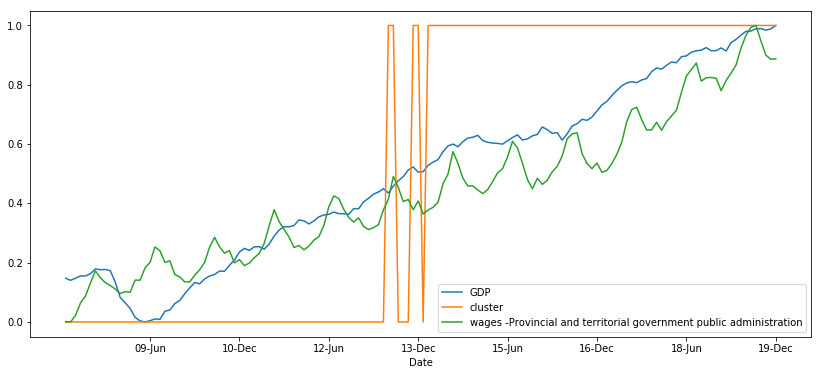

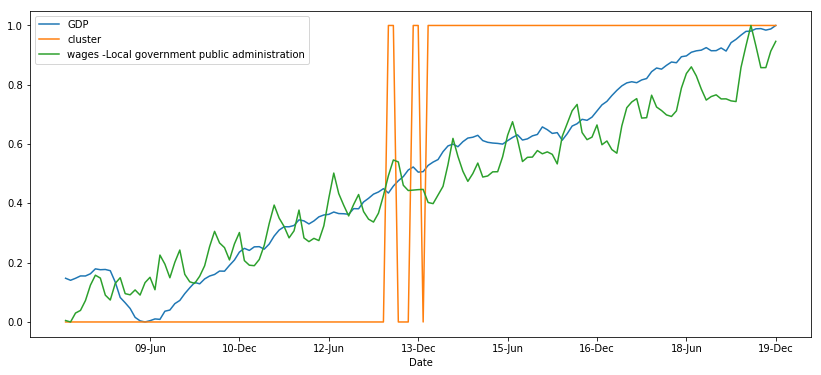

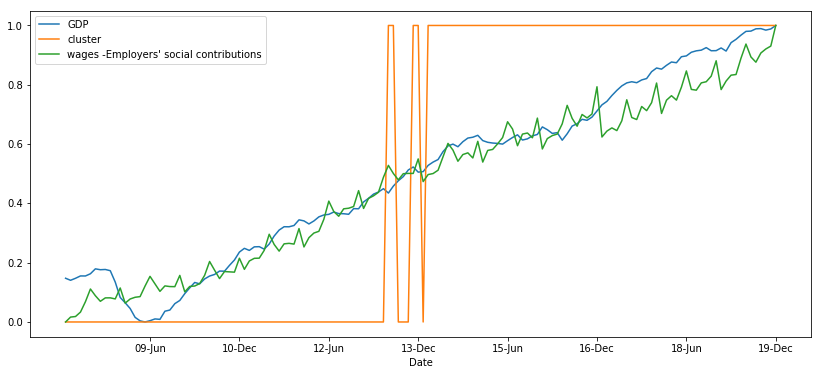

In [12]:
tick_labels = []
for i in range(1,9):
    tick_labels.append(list(n_df.index)[(i*18)-1])

for col in list(data.columns):
    plot_list = ['GDP','cluster']
    plot_list.append(col)
    plot_data = n_df[plot_list]
    plot_data.plot.line(figsize=(14,6),use_index=True)
    plt.xlabel('Date')
    ax = plt.axes()
    ax.set_xticklabels(tick_labels)
    ax.xaxis.set_ticks([17,35,53,71,89,107,125,143])


## Clasifying GDP with Varying Cluster Size

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Library

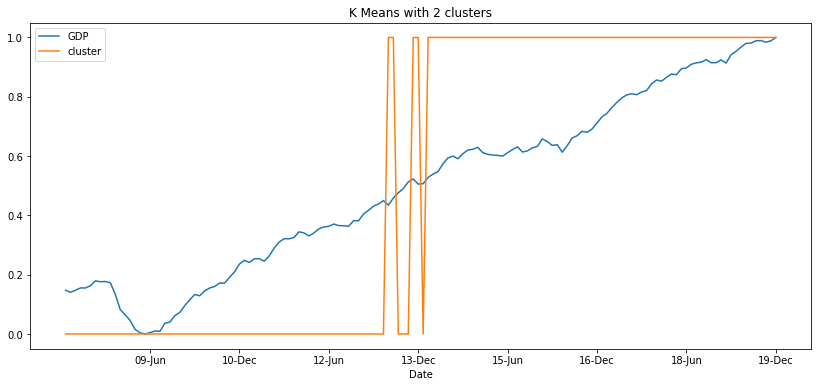

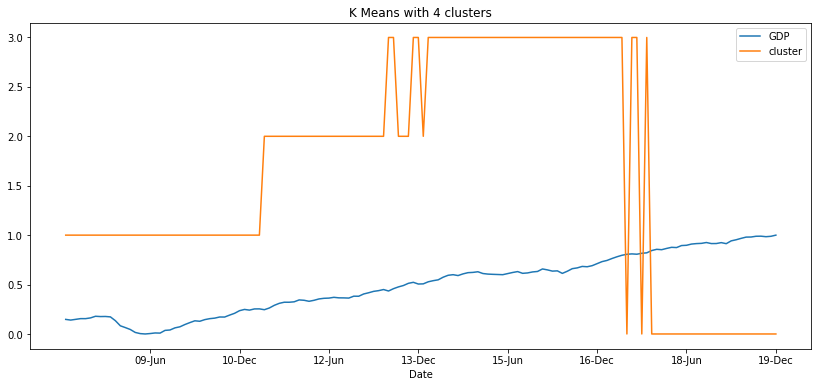

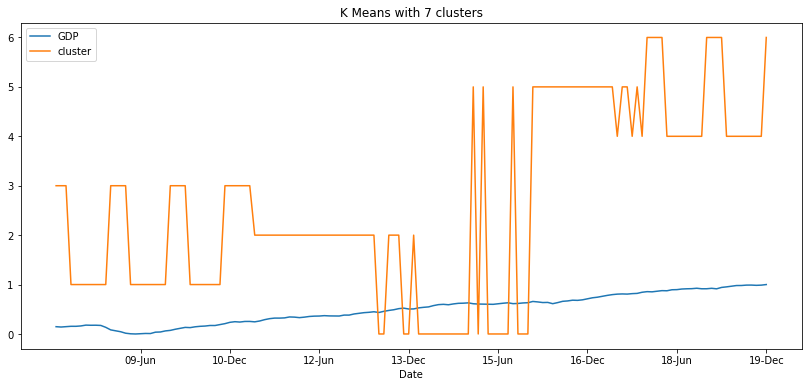

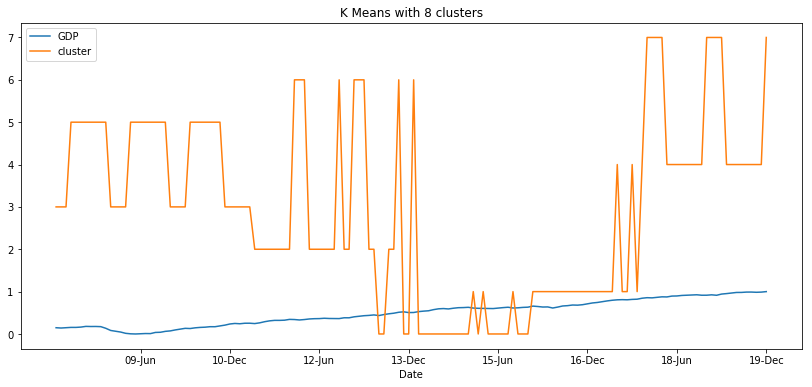

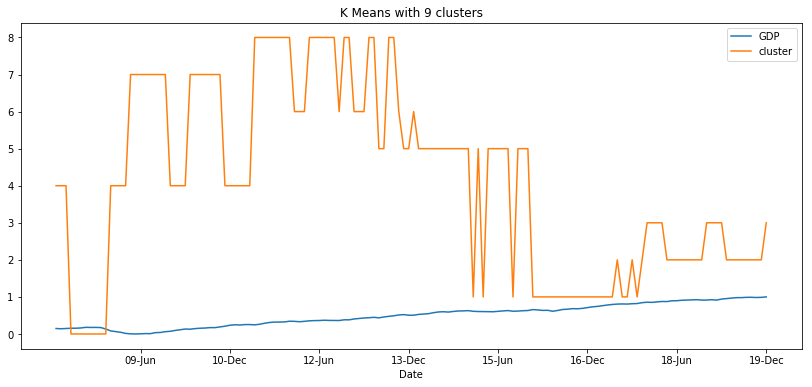

In [13]:
tick_labels = []
for i in range(1,9):
    tick_labels.append(list(n_df.index)[(i*18)-1])
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(n_df)
    kmeans.fit(n_df)
    cluster_labels = list(kmeans.labels_)
    n_df['cluster']= cluster_labels
    plot_list = ['GDP','cluster']
    plot_data = n_df[plot_list]
    plot_data.plot.line(figsize=(14,6),use_index=True)
    plt.xlabel('Date')
    plt.title('K Means with '+str(i)+' clusters')
    ax = plt.axes()
    ax.set_xticklabels(tick_labels)
    ax.xaxis.set_ticks([17,35,53,71,89,107,125,143])


# Clustering Data - Selected Data

In [14]:
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(n_df)
    kmeans.fit(s_df)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1, 11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [18]:
kmeans = KMeans(n_clusters=2, random_state=0).fit(n_df)
print(kmeans.labels_)
print(kmeans.cluster_centers_)
cluster_labels = list(kmeans.labels_)
s_df['cluster']= cluster_labels

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 1 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
[[0.23144955 0.36664406 0.2963128  0.40312297 0.33176617 0.22432304
  0.26774042 0.42464379 0.49699047 0.64508874 0.42884529 0.52636652
  0.44604121 0.61008656 0.57550676 0.58081464 0.26139634 0.44410828
  0.33812181 0.44116704 0.34247342 0.43964709 0.1735989  0.16452254
  0.30985152 0.27289232 0.41617015 0.23649569 0.32245352 0.30838942
  0.15651013 0.17579577 0.14603592 0.16138943 0.20610482 0.14500444
  0.37761094 0.21336502 0.32765406 0.11251744 0.35937083 0.23528023
  0.24585437 0.22111692 0.        ]
 [0.74170187 0.49129687 0.14390628 0.60120618 0.40506908 0.45133949
  0.56469817 0.4410634  0.50085955 0.62645189 0.3992619  0.47348323
  0.45622814 0.60229438 0.50911678 0.62152383 0.28680531 0.

##### Replotting with cluster labels

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


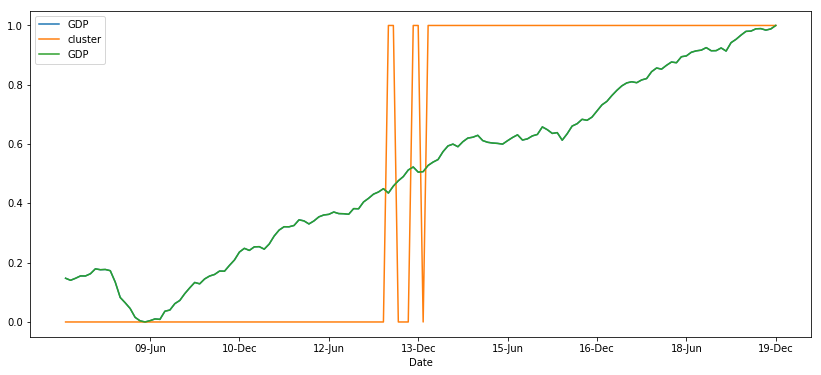

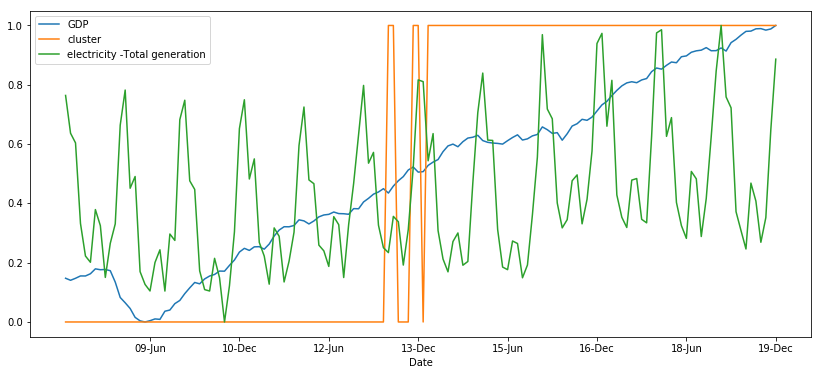

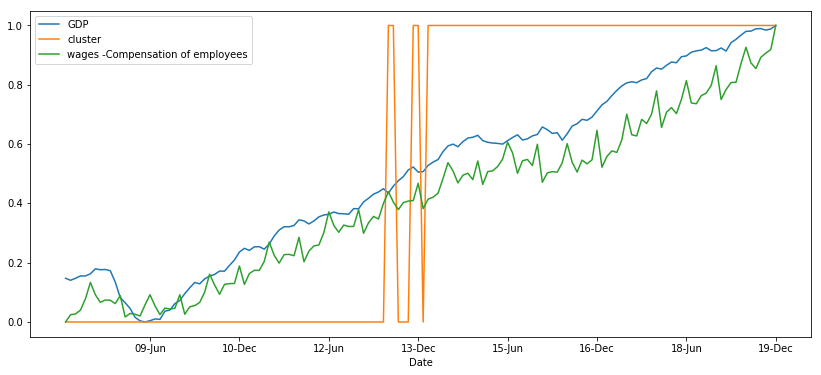

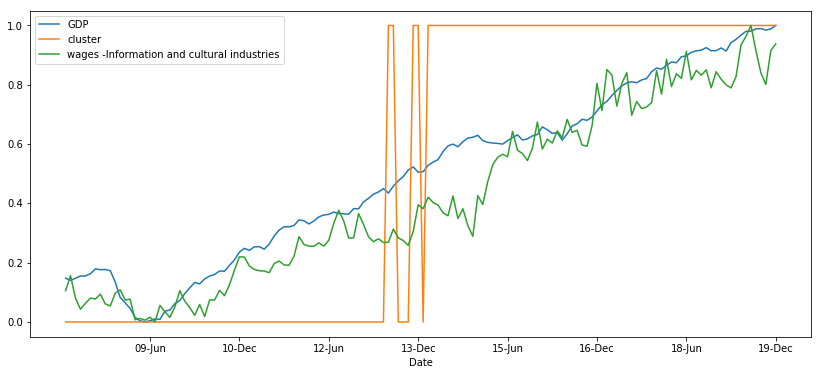

In [19]:
tick_labels = []
for i in range(1,9):
    tick_labels.append(list(s_df.index)[(i*18)-1])

for col in list(s_df.columns):
    plot_list = ['GDP','cluster']
    plot_list.append(col)
    plot_data = s_df[plot_list]
    plot_data.plot.line(figsize=(14,6),use_index=True)
    plt.xlabel('Date')
    ax = plt.axes()
    ax.set_xticklabels(tick_labels)
    ax.xaxis.set_ticks([17,35,53,71,89,107,125,143])

## Clasifying GDP with Varying Cluster Size

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "
/Library

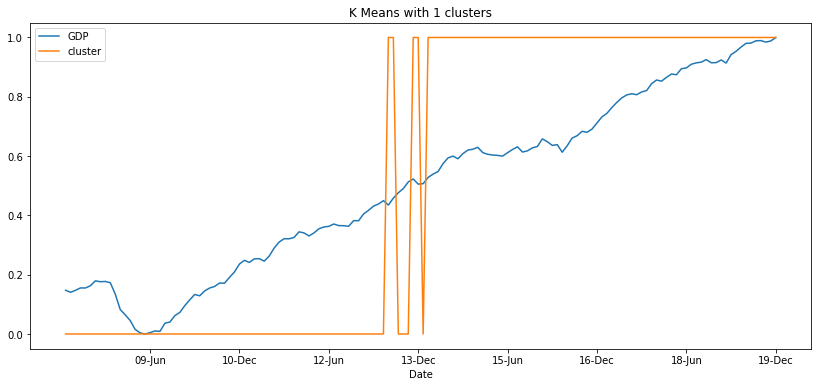

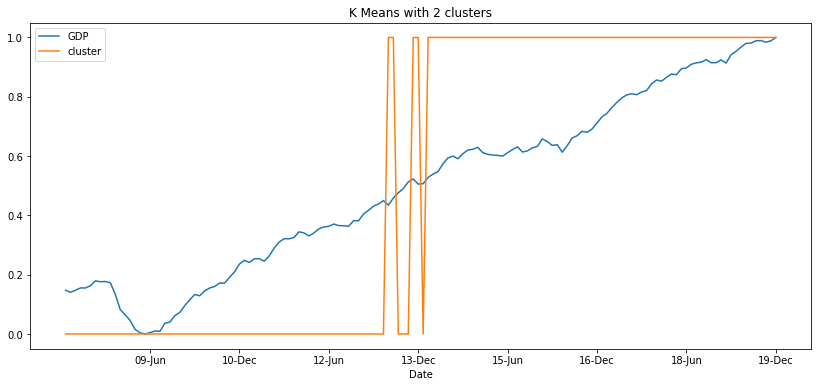

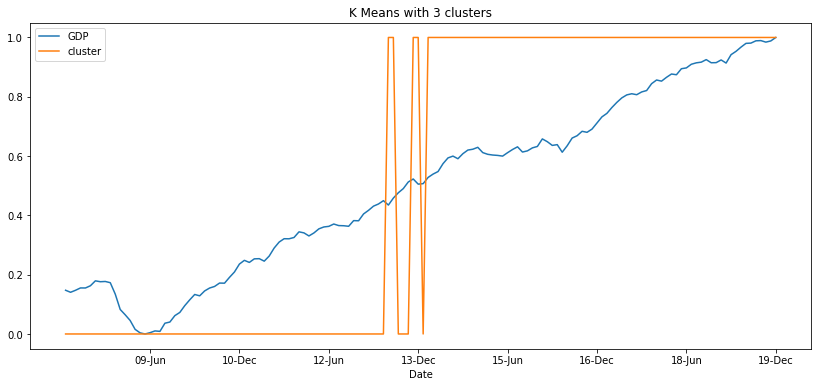

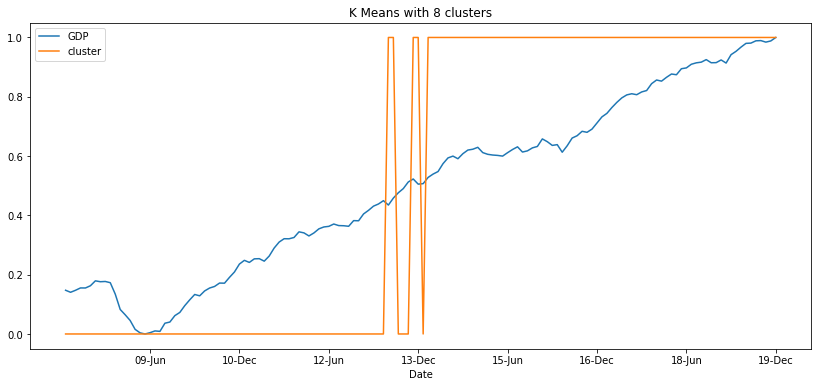

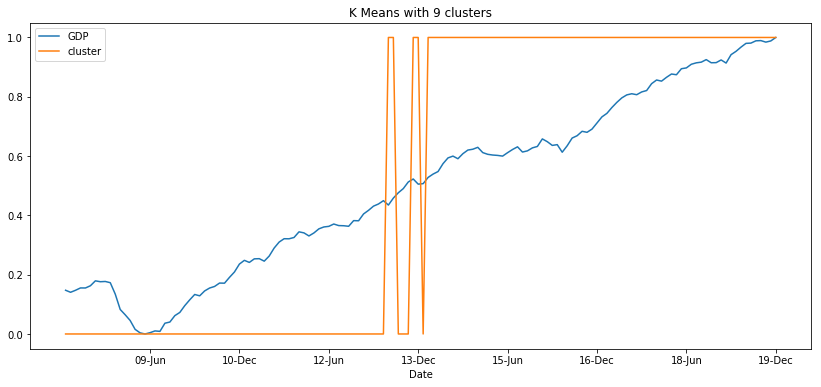

In [20]:
tick_labels = []
for i in range(1,9):
    tick_labels.append(list(s_df.index)[(i*18)-1])
Error =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i).fit(n_df)
    kmeans.fit(s_df)
    cluster_labels = list(kmeans.labels_)
    n_df['cluster']= cluster_labels
    plot_list = ['GDP','cluster']
    plot_data = s_df[plot_list]
    plot_data.plot.line(figsize=(14,6),use_index=True)
    plt.xlabel('Date')
    plt.title('K Means with '+str(i)+' clusters')
    ax = plt.axes()
    ax.set_xticklabels(tick_labels)
    ax.xaxis.set_ticks([17,35,53,71,89,107,125,143])